In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

In [2]:
# Carregando a imagem com o OpenCV
imagem  = cv2.imread('Galaxy.jpg')
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # Convertendo a imagem para a cor cinza
image.shape # Dimensões da imagem

(299, 283)

In [3]:
ruido = 64 # Desvio padrão de 64 níveis de intensidade, como foi definido no livro da disciplina

### Função para criar uma lista de imagens ruidosas para aplicar a média

In [ ]:
def imagens_ruidosas(i, r): 
    Lista_imagens_ruidosas=[] # Lista para armazenar as imagens ruidosas
    k = 0
    while(k != 100): # Loop para gerar as imagens ruidosas
        ruidos = np.random.normal(0, r, i.shape) # Função para gerar um ruído aleatório
        imagem_ruidosa = i + ruidos # Criando o rúido gaussiano aditivo 
        Lista_imagens_ruidosas.append(imagem_ruidosa) # Adiciona a imagem ruidosa na lista 
        k = k + 1
    return Lista_imagens_ruidosas

In [5]:
images_ruidosas = imagens_ruidosas(image, ruido) # Criando a lista de imagens ruidosas

### Função para calcular a média das imagens ruidosas, que passa como paramêtros a lista "images_ruidosas" e um parâmetro k (define quantas imagens ruidosas vão ser utilizadas para o cálculo da média)

In [6]:
def media_imagens_ruidosas(images_ruidosas, k): 
    first_image = images_ruidosas[0] # Pegando a primeira imagem da lista para usar como modelo 
    soma = np.zeros_like(first_image) # Cria uma matriz de zeros com o formato de first_image
    count = 1 # Contador a partir da posição 1 da lista 
    while(count != k): # Enquanto count for diferente de k (5, 10, 20, ...), o loop continua
        soma = soma + images_ruidosas[count] # Soma as imagens ruidosas
        count = count + 1
    media = soma/k # Tira a média dividindo soma pelo número de imagens ruidosas (k)
    return media

### Criando as Imagens melhoradas 

In [7]:
imagem_melhorada_5 = media_imagens_ruidosas(images_ruidosas, 5)
imagem_melhorada_10 = media_imagens_ruidosas(images_ruidosas, 10)
imagem_melhorada_20 = media_imagens_ruidosas(images_ruidosas, 20)
imagem_melhorada_50 = media_imagens_ruidosas(images_ruidosas, 50)
imagem_melhorada_100 = media_imagens_ruidosas(images_ruidosas, 100)

Plotando as Imagens 

Text(0.5, 1.0, 'Média de 100 imagens')

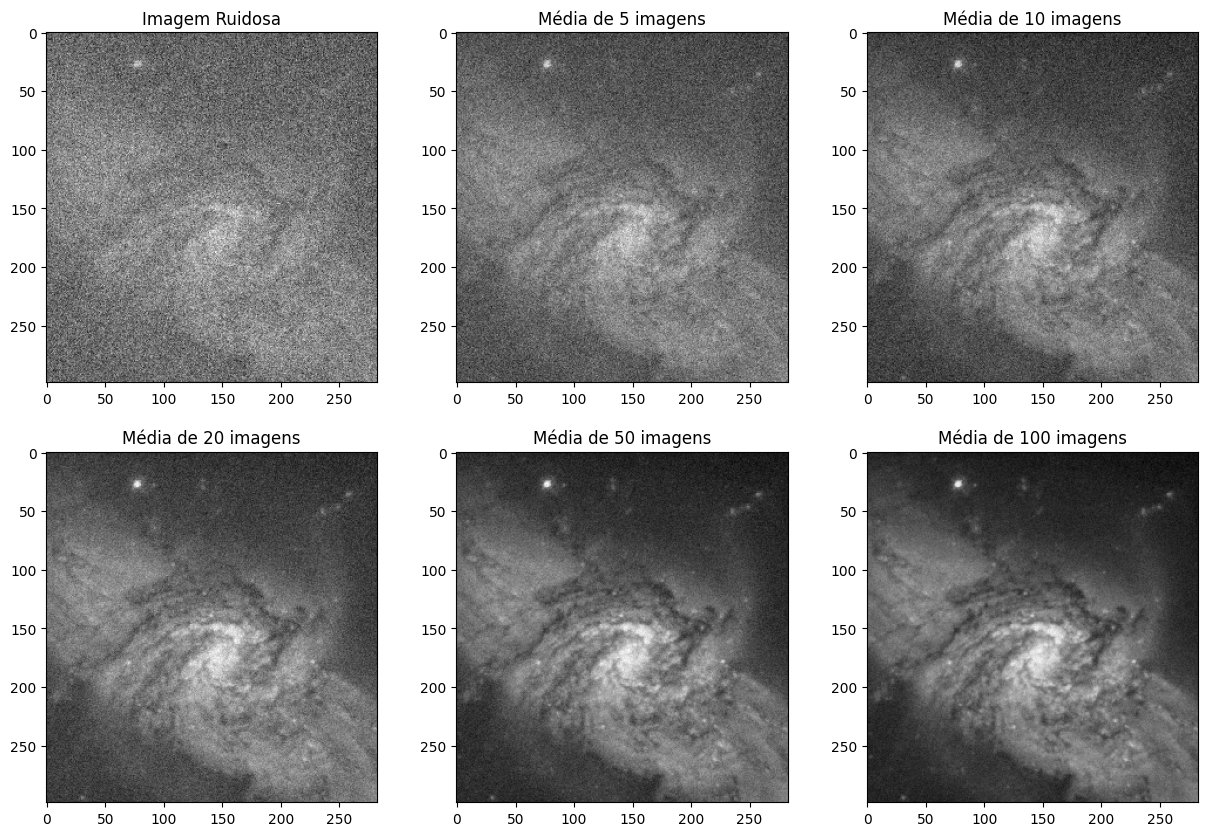

In [8]:
# Plotando as fotos com ruído e com as médias aplicadas

fig, eixos = plt.subplots(2, 3, figsize=(15,10))

eixos[0,0].imshow(images_ruidosas[0], cmap='gray') # Posso escolher qualquer imagem ruidosa da list images_ruidosas[]
eixos[0,0].set_title('Imagem Ruidosa')

eixos[0,1].imshow(imagem_melhorada_5, cmap='gray')
eixos[0,1].set_title(f'Média de 5 imagens')

eixos[0,2].imshow(imagem_melhorada_10, cmap='gray')
eixos[0,2].set_title(f'Média de 10 imagens')

eixos[1,0].imshow(imagem_melhorada_20, cmap='gray')
eixos[1,0].set_title(f'Média de 20 imagens')

eixos[1,1].imshow(imagem_melhorada_50, cmap='gray')
eixos[1,1].set_title(f'Média de 50 imagens')

eixos[1,2].imshow(imagem_melhorada_100, cmap='gray')
eixos[1,2].set_title(f'Média de 100 imagens')
